# Data Science and Business Analytics Internship
## The Sparks Foundation 

## Task 1 
## Simple Linear Regression

  - In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

# Linear regression 
- In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

### The equation of the line is :

### Y= mx + b :

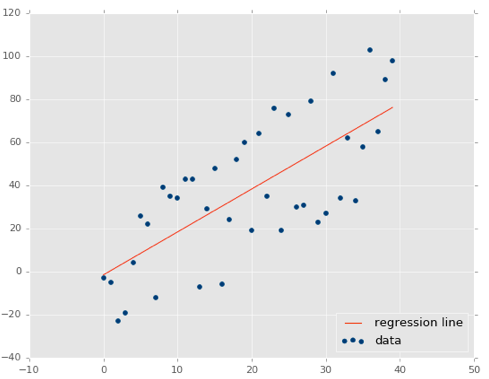

In [52]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [53]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("*************Success*************")

df.head(5)

*************Success*************


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


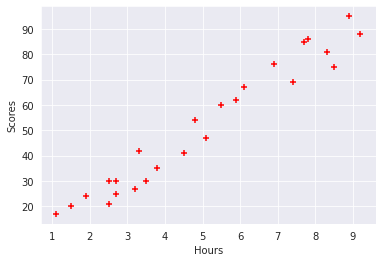

In [54]:
%matplotlib inline
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='red',marker='+')

In [55]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


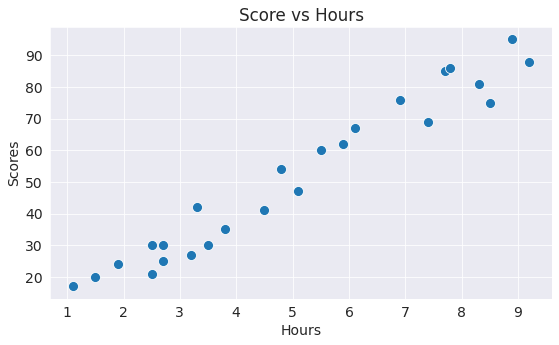

In [56]:
# Create a scatter plot
sns.scatterplot(df.Hours, # X-axis
                df.Scores,  # Y-axis
                s=100);

# Chart title
plt.title("Score vs Hours");

# Preparing the data 


In [57]:
new_df = df.drop('Scores',axis='columns')
new_df.head(5)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [58]:
Scores = df.Scores
Scores.head(3)

0    21
1    47
2    27
Name: Scores, dtype: int64

In [69]:
Hours = df.Hos
Hours.head(3)

0    2.5
1    5.1
2    3.2
Name: Hours, dtype: float64

# Training the Algorithm 

In [59]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,Scores)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Making predictions

In [60]:
reg.predict([[9.25]])

array([92.90985477])

In [61]:
reg.predict([[2.8]])

array([29.8559229])

In [62]:
reg.coef_

array([9.77580339])

In [63]:
reg.intercept_

2.48367340537321

#### **Y = m * X + b (m is coefficient and b is intercept)**

In [64]:
9.25*9.77580339 + 2.48367340537321

92.90985476287321

# Evaluating the model

In [45]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(Scores,new_df[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(new_df[list(feature_set)]) - Scores) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [50]:
import statsmodels.api as sm
model = sm.OLS.from_formula("Scores ~ Hours ", data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           9.13e-17
Time:                        15:46:10   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""